In [76]:
#Importar librerias
import xarray as xr
!pip install netcdf4
!pip install windrose
from windrose import WindroseAxes
import matplotlib.pyplot as plt
import numpy as np
import skillsnetwork
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set()

In [10]:
#Importa desde NDBC
dataset = xr.open_dataset('https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/44025/44025.ncml')

#Elige intervalo de datos
dataset = dataset.sel(time=slice('2016-01-01','2020-01-02'))

#Convierte a dataframe y toma como indice la columna "time"
df = dataset.to_dataframe().reset_index().set_index('time')

In [11]:
#Visualiza Datos importantes
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34506 entries, 2016-01-01 00:50:00 to 2019-12-31 22:50:00
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   latitude                 34506 non-null  float64        
 1   longitude                34506 non-null  float64        
 2   wind_dir                 34479 non-null  float64        
 3   wind_spd                 34506 non-null  float32        
 4   gust                     34506 non-null  float32        
 5   wave_height              34488 non-null  float32        
 6   dominant_wpd             34458 non-null  timedelta64[ns]
 7   average_wpd              34488 non-null  timedelta64[ns]
 8   mean_wave_dir            34458 non-null  float64        
 9   air_pressure             34506 non-null  float32        
 10  air_temperature          34505 non-null  float32        
 11  sea_surface_temperature  34506 non-null  floa

In [12]:
#Las columnas "visibility", "water_level" y "dewpt_temperature" no aportan informacion.

#Visualizar columnas
df[['visibility','water_level', "dewpt_temperature"]]

#Eliminar columnas 
df=df.drop(['visibility','water_level', "dewpt_temperature"], axis=1)
display(df.head(50))

,latitude,longitude,wind_dir,wind_spd,gust,wave_height,dominant_wpd,average_wpd,mean_wave_dir,air_pressure,air_temperature,sea_surface_temperature
time,,,,,,,,,,,,
2016-01-01 00:50:00,40.250999,-73.164001,322.0,6.7,8.6,1.03,0 days 00:00:10,0 days 00:00:04.510000229,107.0,1018.200012,8.6,11.7
2016-01-01 01:50:00,40.250999,-73.164001,313.0,7.4,9.6,0.99,0 days 00:00:09.090000153,0 days 00:00:04.639999866,109.0,1018.299988,8.6,11.7
2016-01-01 02:50:00,40.250999,-73.164001,327.0,7.4,8.9,0.97,0 days 00:00:09.090000153,0 days 00:00:04.369999886,109.0,1018.200012,8.3,11.7
2016-01-01 03:50:00,40.250999,-73.164001,307.0,7.3,9.3,1.10,0 days 00:00:04.170000076,0 days 00:00:04.360000134,295.0,1018.200012,8.0,11.7
2016-01-01 04:50:00,40.250999,-73.164001,327.0,7.4,9.1,1.00,0 days 00:00:04.349999905,0 days 00:00:04.340000153,289.0,1017.400024,7.4,11.7
2016-01-01 05:50:00,40.250999,-73.164001,329.0,7.8,9.9,1.01,0 days 00:00:04.550000191,0 days 00:00:04.239999771,280.0,1016.599976,7.2,11.7
2016-01-01 06:50:00,40.250999,-73.164001,325.0,6.9,8.7,0.98,0 days 00:00:09.090000153,0 days 00:00:04.320000172,115.0,1017.099976,6.6,11.7
2016-01-01 07:50:00,40.250999,-73.164001,308.0,7.6,9.9,0.92,0 days 00:00:10,0 days 00:00:04.070000172,101.0,1017.500000,6.6,11.7
2016-01-01 08:50:00,40.250999,-73.164001,322.0,7.1,9.3,0.94,0 days 00:00:10,0 days 00:00:04.170000076,98.0,1017.200012,6.5,11.6


In [13]:
#Ver que tipo de datos tiene por columna
df.dtypes

latitude                           float64
longitude                          float64
wind_dir                           float64
wind_spd                           float32
gust                               float32
wave_height                        float32
dominant_wpd               timedelta64[ns]
average_wpd                timedelta64[ns]
mean_wave_dir                      float64
air_pressure                       float32
air_temperature                    float32
sea_surface_temperature            float32
dtype: object

In [64]:
#Remplzamos nulos con la media
df.fillna(df.mean(),inplace=True)

#CAmbia nombres de columnas
df2=df.rename(columns={"latitude":"Latitud", "longitude":"longitud", "wind_dir":"Direccion_del_viento", "wind_spd":"velocidad_del_viento", "gust":"Velocidad de rafaga", "wave_height":"Altura de la ola", "dominant_wpd":"Periodo dominante", "average_wpd":"Periodo promedio", "mean_wave_dir":"Direccion de la ola", "air_pressure":"Presion del aire", "air_temperature":"Temperatura del aire", "sea_surface_temperature":"Temperaura superficial mar"})

#Datos estadisticos
df2.describe()

,Latitud,longitud,Direccion_del_viento,velocidad_del_viento,Velocidad de rafaga,Altura de la ola,Periodo dominante,Periodo promedio,Direccion de la ola,Presion del aire,Temperatura del aire,Temperaura superficial mar
count,34506.000000,34506.000000,34506.000000,34506.000000,34506.000000,34506.000000,34506,34506,34506.000000,34506.000000,34506.000000,34506.000000
mean,40.250999,-73.164001,196.409293,6.793682,8.288418,1.311205,0 days 00:00:07.432988620,0 days 00:00:05.129636687,164.275089,1016.716614,12.460838,13.662408
std,0.000000,0.000000,100.122819,3.536670,4.325649,0.741839,0 days 00:00:02.552718263,0 days 00:00:01.055101823,69.480957,8.077261,8.027649,6.742240
min,40.250999,-73.164001,1.000000,0.000000,0.000000,0.200000,0 days 00:00:02.470000029,0 days 00:00:02.829999924,1.000000,977.099976,-14.500000,3.100000
25%,40.250999,-73.164001,107.000000,4.200000,5.000000,0.800000,0 days 00:00:05.559999943,0 days 00:00:04.369999886,113.000000,1011.900024,6.300000,7.300000
50%,40.250999,-73.164001,212.000000,6.300000,7.600000,1.110000,0 days 00:00:07.139999866,0 days 00:00:04.960000038,153.000000,1016.799988,11.700000,12.900000
75%,40.250999,-73.164001,282.000000,9.100000,11.000000,1.640000,0 days 00:00:09.090000153,0 days 00:00:05.719999790,198.000000,1021.799988,19.900000,20.000000
max,40.250999,-73.164001,360.000000,23.200001,27.900000,7.010000,0 days 00:00:17.389999390,0 days 00:00:10.939999580,360.000000,1043.800049,27.799999,29.100000


Outliers

En estadística, un valor atípico es un punto de observación que está distante de otras observaciones. Un valor atípico puede deberse a algunos errores en la recopilación o el registro de datos, o debido a la alta variabilidad natural de los puntos de datos. Cómo tratar un valor atípico depende en gran medida de nuestros datos o del tipo de análisis que se realice. Los valores atípicos pueden afectar notablemente a nuestros modelos y pueden ser una valiosa fuente de información, brindándonos información sobre comportamientos específicos.

Hay muchas maneras de descubrir valores atípicos en nuestros datos. Podemos hacer un análisis univariado (utilizando un análisis de una variable) o un análisis multivariado (utilizando dos o más variables). Una de las formas más sencillas de detectar un valor atípico es inspeccionar los datos visualmente, haciendo diagramas de caja o diagramas de dispersión.

Análisis univariado
Un diagrama de caja es un método para representar gráficamente grupos de datos numéricos a través de sus cuartiles. Los diagramas de caja también pueden tener líneas que se extienden verticalmente desde las cajas (bigotes) que indican la variabilidad fuera de los cuartiles superior e inferior. Los valores atípicos se pueden trazar como puntos individuales. Para obtener más información sobre diagramas de caja, haga clic aquí.

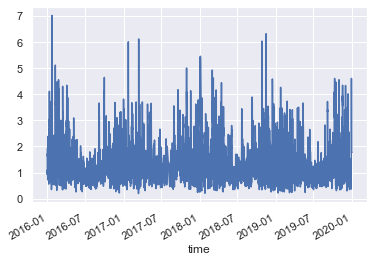

In [66]:
df.wave_height.plot();

<AxesSubplot:xlabel='Altura de la ola'>

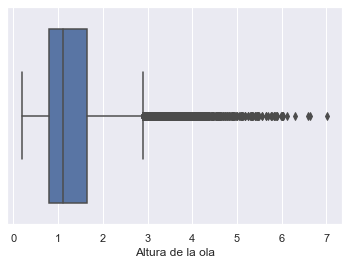

In [68]:
sns.boxplot(x=df2["Altura de la ola"])

Como podemos ver en estos dos gráficos, tenemos algunos puntos que están trazados fuera del área del gráfico de caja y que se desvían mucho del resto de la población.

<AxesSubplot:xlabel='Temperatura del aire'>

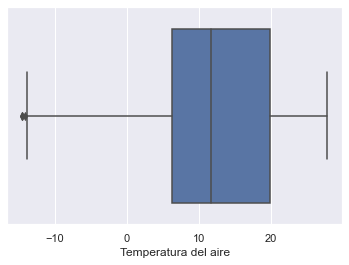

In [69]:
sns.boxplot(x=df2["Temperatura del aire"])

Los datos paarecen tener un buen comportamiento 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


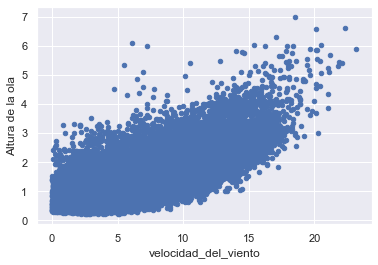

In [72]:
#Análisis bivariable

price_area = df2.plot.scatter(x='velocidad_del_viento', y='Altura de la ola')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


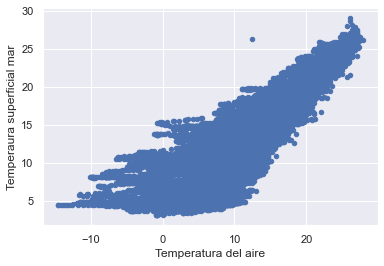

In [74]:
price_area = df2.plot.scatter(x="Temperatura del aire", y="Temperaura superficial mar")

En general el comportamiento de los datos es aceptable para el propositode este trabajo

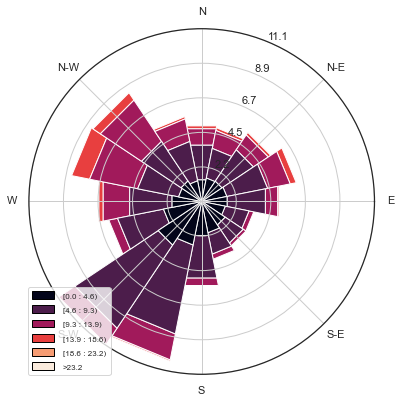

In [77]:
#Rosa de vientos

sns.set_style("white")
fig = plt.figure(figsize=(6,6))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(df2.Direccion_del_viento, df2.velocidad_del_viento, normed=True, opening=1, edgecolor='white')
ax.set_legend();

In [16]:
#Las fechas en las cuales se registraron las olas mas altas
df.wave_height.nlargest()

time
2016-01-23 18:50:00    7.01
2016-01-23 15:50:00    6.63
2016-01-23 17:50:00    6.58
2018-11-16 06:50:00    6.31
2017-03-14 18:50:00    6.11
Name: wave_height, dtype: float32

In [17]:
"""Hipotesis 1"""
#las olas que tienen altura mayor a 1.31 m (Donde 1.31 es la altura media) son producidas por vientos mayores que las olas con altura menor a 1.31 m

Olagrande = df.loc[df.wave_height>=1.31]
Olagrande_viento = Olagrande.wind_spd
OG_viento_media = Olagrande_viento.mean()
OG_viento_media

9.375016212463379

In [18]:
Olapeque = df.loc[df.wave_height<1.31]
Olapeque_viento = Olapeque.wind_spd
OP_viento_media = Olapeque_viento.mean()
OP_viento_media

#se cumple

5.1806840896606445

C:\Users\cfzap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\cfzap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wind_spd', ylabel='Density'>

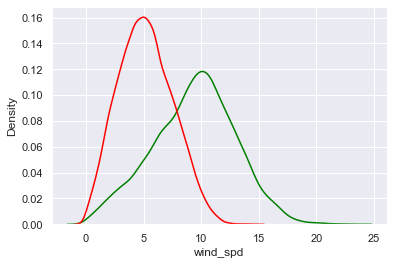

In [19]:
#Grafico de dencidad 
Olagrande_viento 
Olapeque_viento

sns.distplot(Olagrande_viento,color='green',hist=False)
sns.distplot(Olapeque_viento,color='red',hist=False)

In [20]:
"""Hipotesis 2"""
#las olas dominantes con periodo menor a la media, se producen por vientos mayores que las que tienen periodo mayor



OlaPeriodoGra = df.loc[df.dominant_wpd>=df["dominant_wpd"].mean()]
OlaPeriodoGra_viento = OlaPeriodoGra.wind_spd
OPG_viento_media = OlaPeriodoGra_viento.mean()
OPG_viento_media

5.843324184417725

In [21]:
OlaPeriodoPeq = df.loc[df.dominant_wpd<df["dominant_wpd"].mean()]
OlaPeriodoPeq_viento = OlaPeriodoPeq.wind_spd
OPp_viento_media = OlaPeriodoPeq_viento.mean()
OPp_viento_media

#Secumple

7.6029229164123535

In [22]:
"""Hipotesis 3"""

#Cuando la presion es mayor a la media, la velocidad del viento es mayor que la velocidad del viento a una presion menor


PresionGrande = df.loc[df.air_pressure>=df["air_pressure"].mean()]
PresionGrande_velocidad = PresionGrande.wind_spd
PG_velocidad_media = PresionGrande_velocidad.mean()
PG_velocidad_media 

6.214035511016846

In [23]:
PresionPeq = df.loc[df.air_pressure<df["air_pressure"].mean()]
PresionPeq_velocidad = PresionPeq.wind_spd
Pq_velocidad_media = PresionPeq_velocidad.mean()
Pq_velocidad_media


#No se cumple 

7.382229804992676

In [24]:
"""Hipotesis 4"""

#La temperatura del aire no afecta el periodo promedio de las olas


TemGrande = df.loc[df.air_temperature>=df["air_temperature"].mean()]
TemGrande_peri = TemGrande.average_wpd
TG_peri_media = TemGrande_peri.mean()
TG_peri_media

Timedelta('0 days 00:00:05.177994847')

In [25]:
TemPeq = df.loc[df.air_temperature<df["air_temperature"].mean()]
TemPeq_peri = TemPeq.average_wpd
Tp_peri_media = TemPeq_peri.mean()
Tp_peri_media


#Se cumple

Timedelta('0 days 00:00:05.085840064')

In [26]:
"""Hipotesis 5"""

#La temperatura de la superficie del agua, afecta de manera inversa al periodo de la ola promedio

TemGrande_Agua = df.loc[df.sea_surface_temperature>=df["sea_surface_temperature"].mean()]
TemGrande_peri_Agua = TemGrande_Agua.average_wpd
TG_peri_media_Agua = TemGrande_peri_Agua.mean()
TG_peri_media_Agua

Timedelta('0 days 00:00:05.141983065')

In [27]:
TemPeq_Agua = df.loc[df.sea_surface_temperature<df["sea_surface_temperature"].mean()]
TemPeq_peri_Agua = TemPeq_Agua.average_wpd
Tp_peri_media_Agua = TemPeq_peri_Agua.mean()
Tp_peri_media_Agua


#No se cumple (Pero la diferencia es muy pequeña 0.03 aprox)

Timedelta('0 days 00:00:05.118548107')

In [28]:
"""Hipotesis 6"""

#Las olas con mayor periodo  dominante tienen menor altura


perioGrande = df.loc[df.dominant_wpd>=df["dominant_wpd"].mean()]
perioGrande_altura = PresionGrande.wave_height
PG_Altura_media = perioGrande_altura.mean()
PG_Altura_media 

1.115169882774353

In [29]:
perioPeq= df.loc[df.dominant_wpd<df["dominant_wpd"].mean()]
perioPeq_altura = PresionPeq.wave_height
Pp_Altura_media = perioPeq_altura.mean()
Pp_Altura_media 

#Secumple

1.5102275609970093

In [32]:
#Elimino primeras dos filas porque no es de interes ver como se relcionana dos posiciones 
df3=df2.drop(['Latitud','longitud'], axis=1)

#Matriz de correlacion
df3.corr()

,Direccion del viento,velocidad del viento,Velocidad de rafaga,Altura de la ola,Direccion de la ola,Presion del aire,Temperatura del aire,Temperaura superficial mar
Direccion del viento,1.000000,0.126323,0.140290,0.003041,0.506852,-0.123969,-0.162934,-0.121907
velocidad del viento,0.126323,1.000000,0.993647,0.687944,0.284765,-0.259820,-0.327163,-0.244115
Velocidad de rafaga,0.140290,0.993647,1.000000,0.695743,0.297181,-0.244609,-0.360469,-0.256908
Altura de la ola,0.003041,0.687944,0.695743,1.000000,0.015599,-0.410822,-0.225382,-0.216674
Direccion de la ola,0.506852,0.284765,0.297181,0.015599,1.000000,-0.039120,-0.238282,-0.142318
Presion del aire,-0.123969,-0.259820,-0.244609,-0.410822,-0.039120,1.000000,-0.169475,-0.050542
Temperatura del aire,-0.162934,-0.327163,-0.360469,-0.225382,-0.238282,-0.169475,1.000000,0.910439
Temperaura superficial mar,-0.121907,-0.244115,-0.256908,-0.216674,-0.142318,-0.050542,0.910439,1.000000


De lo anteior se puede señalar algunas correlaciones que resultan muy intuitivas, como la de la temperatura de la
temperarua del mar (0.910439), la de la velocidad del viento con la altura de las olas (0.687944), y la de la velocidad 
del viento con la velocidad de rafaga (0.993647)

<AxesSubplot:>

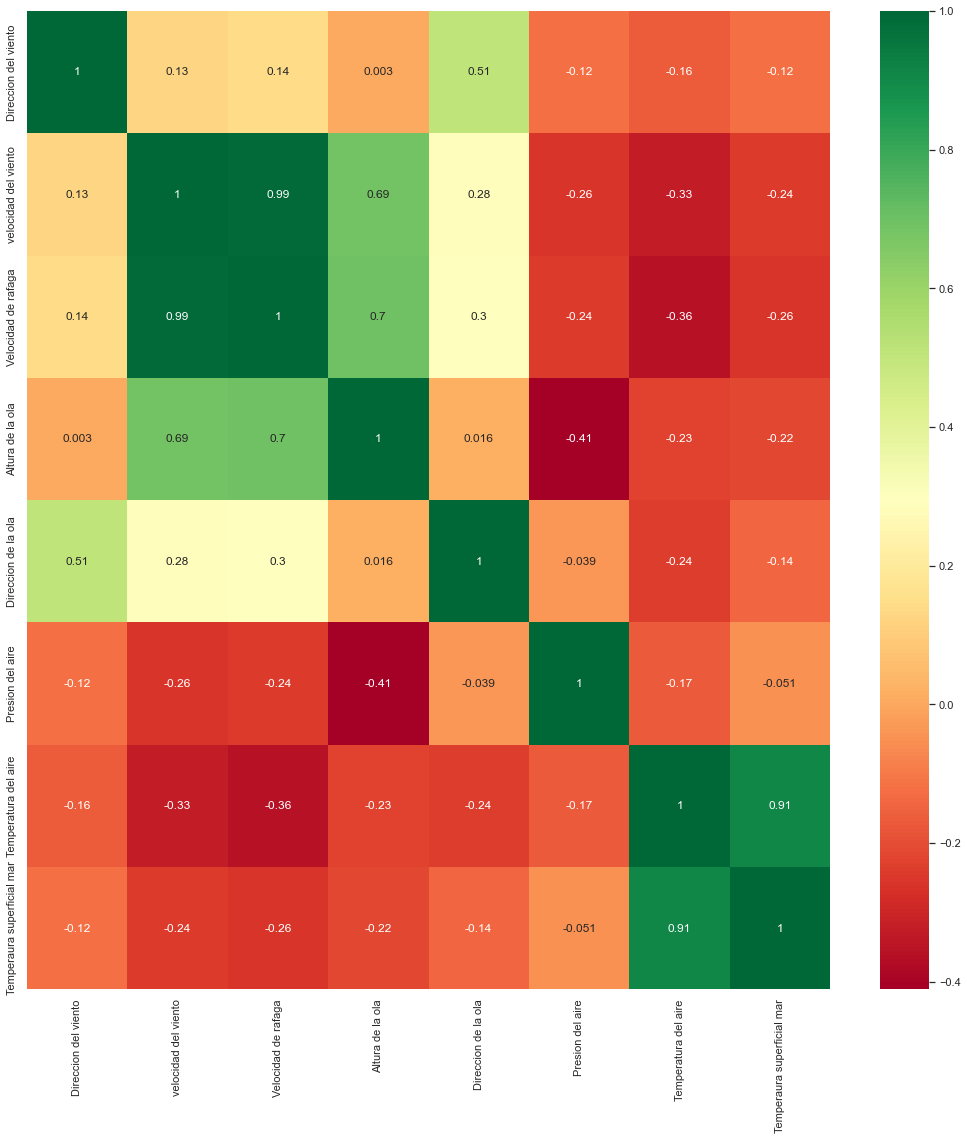

In [53]:
plt.figure(figsize=(18, 18)) 
sns.heatmap(df3.corr(), annot=True, cmap='RdYlGn')